## <div style="text-align: center"> DA5401 Data Analytics Labarotary  </div>

### <div style="text-align: center">Assignment 8 - Submitted by: DA24M011 - Nandhakishore C S</div>

<p style='text-align: justify;'> (From Question) </p>
<p style='text-aligh: justify;'> 
	Let’s consider an easy example of a non-linear dataset, the circles dataset. The dataset can be generated using the following code-snippet.
</p>

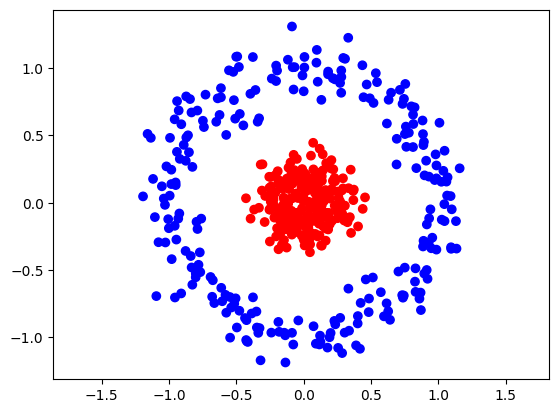

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
X, y = make_circles(
	n_samples = 500, 
	noise = 0.1, 
	random_state = 42, 
	factor = 0.2
)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=colors.ListedColormap(["blue", "red"]))
plt.axis('equal')
plt.show()

### <p style='text-align: justify;'> Task 1 </p>
<p style='text-align: justify;'> Implement Adaboost Classifier from scratch </p>

<p style='text-align: justify;'> Importing Libraries </p>

In [2]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<p style='text-align: justify;'> User defined functions to plot decision boundaries </p>

In [3]:
def plot_decision_boundary(clf, X, y, ax, iteration=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(["blue", "red"]))
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["blue", "red"]), edgecolor='k', s=20)
    ax.axis('equal')
    if iteration is not None:
        ax.set_title(f'Iteration {iteration + 1}')
    else:
        title = 'Decision Boundary' + str(clf)
        ax.set_title(title)

<p style='text-align: justify;'> User defined class to implement Adaptive Boosting algorithm </p>

In [4]:
class ADAptive_BOOST: 
    __slots__ = '_weak_clf', '_n_iter', '_lr','_clfs', '_alpha'
    def __init__(self, weak_clf, n_iter:int = 100, learning_rate: float = 0.5):
        self._weak_clf = weak_clf
        self._n_iter = n_iter
        self._lr = learning_rate
        self._clfs = []
        self._alpha = [] 
        
    def fit(self, X, y) -> None:
        n_samples, _ = X.shape

        # uniform weights 
        w = np.ones(n_samples) / n_samples
        
        for _ in range(self._n_iter): 
            # Fitting a weak classifier for 'i'th iteration
            clf = self._weak_clf()
            clf.fit(X, y, sample_weight = w)
            pred_y = clf.predict(X)
            
            # Computer error for 'i'th iteration 
            e = (pred_y != y)
            t_error = (np.sum(w * e)) / np.sum(w)
            # a = self._lr * np.sqrt((np.log((1 - t_error)/(t_error + 1e-10))))			#Gives Nan
            a = self._lr * (np.log((1 - t_error)/(t_error + 1e-10)))

            # weight updation 
            w *= np.exp(a * e)
            w /= np.sum(w)

            # storing alpha and classification for prediction 
            self._clfs.append(clf)
            self._alpha.append(a)

    def predict(self, X) -> np.ndarray:
        pred_in_clfs = np.array([clf.predict(X) for clf in self._clfs])
        return np.sign(np.dot(self._alpha, pred_in_clfs))
    
    @property
    def estimators_(self): 
        return self._clfs

<p style='text-align: justify;'> As per texts, the error formulae has a square root operator and when implemented for coputing error , the values are very close to zero, giving nan values. Thus it is omitted. Refer Bishop Book Chapter 14</p>

Decisiton Tree (Stump) 0.5


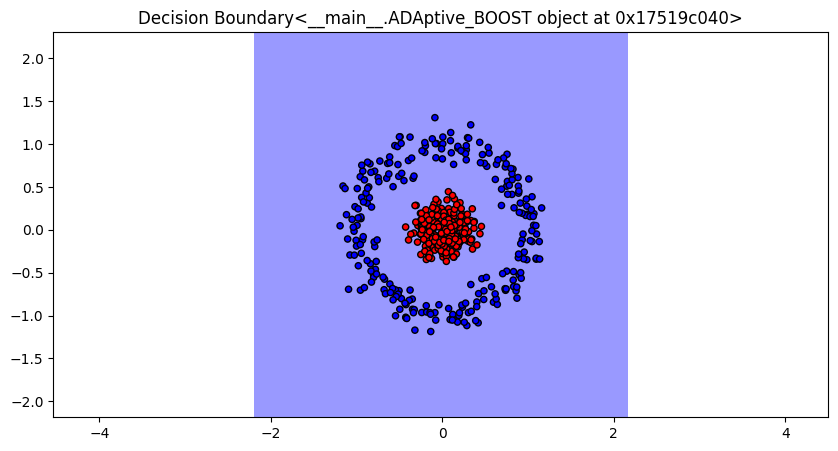

In [5]:
weak_classifiers = { 
    'Decisiton Tree (Stump)': lambda: DecisionTreeClassifier(max_depth = 1)
}

for clf_name, clf in weak_classifiers.items():     
    adaboost = ADAptive_BOOST(weak_clf=clf, learning_rate=0.5) 
    adaboost.fit(X_train,y_train)
    prediction = adaboost.predict(X)
    accuracy = np.mean(prediction == y)
    print(clf_name, accuracy)
    
# Plot the final decision boundary
fig, ax = plt.subplots(figsize=(10, 5))
plot_decision_boundary(adaboost, X, y, ax)
plt.show()

Decisiton Tree 0.72


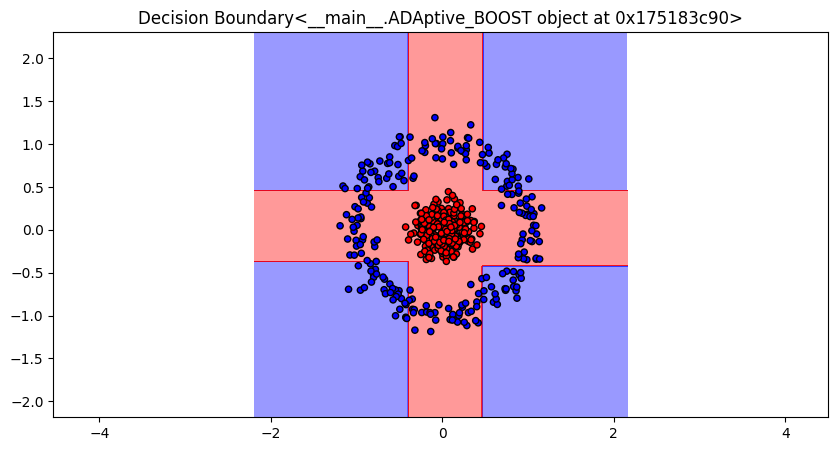

In [6]:
weak_classifiers = { 
    'Decisiton Tree': lambda: DecisionTreeClassifier(max_depth = 3)
}

for clf_name, clf in weak_classifiers.items():     
    adaboost = ADAptive_BOOST(weak_clf=clf, learning_rate=0.5) 
    adaboost.fit(X_train,y_train)
    prediction = adaboost.predict(X)
    accuracy = np.mean(prediction == y)
    print(clf_name, accuracy)
    
# Plot the final decision boundary
fig, ax = plt.subplots(figsize=(10, 5))
plot_decision_boundary(adaboost, X, y, ax)
plt.show()

Logistic Regression 0.334


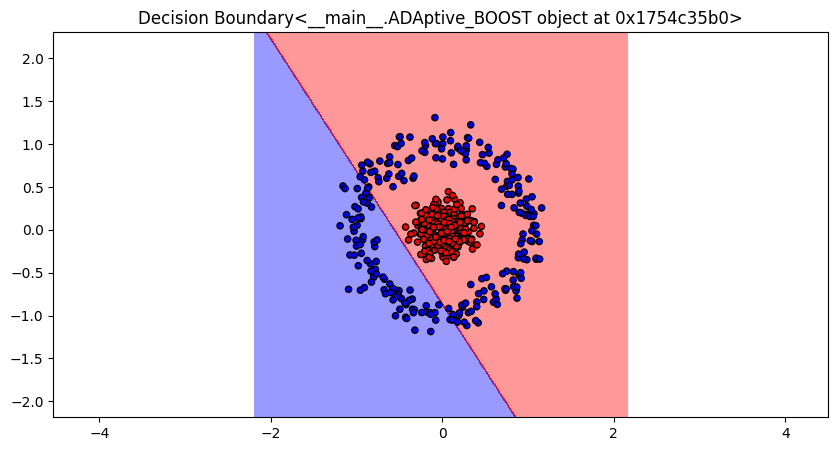

In [7]:
weak_classifiers = { 
	'Logistic Regression' : lambda: LogisticRegression(max_iter = 10000)
}

for clf_name, clf in weak_classifiers.items():     
    adaboost = ADAptive_BOOST(weak_clf=clf, learning_rate=0.5) 
    adaboost.fit(X_train,y_train)
    prediction = adaboost.predict(X)
    accuracy = np.mean(prediction == y)
    print(clf_name, accuracy)
    
# Plot the final decision boundary
fig, ax = plt.subplots(figsize=(10, 5))
plot_decision_boundary(adaboost, X, y, ax)
plt.show()

Linear SVM 0.5


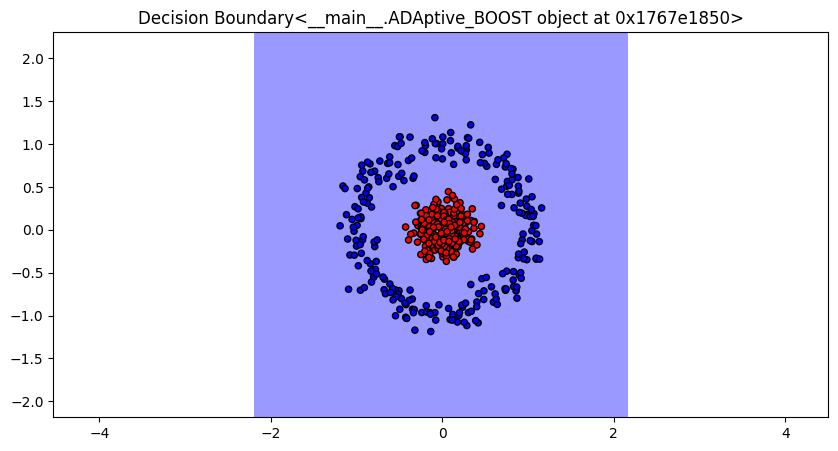

In [9]:
weak_classifiers = { 
    'Linear SVM': lambda: SVC(kernel = 'linear', probability = True)
}

for clf_name, clf in weak_classifiers.items():     
    adaboost = ADAptive_BOOST(weak_clf=clf, learning_rate=0.5) 
    adaboost.fit(X_train,y_train)
    prediction = adaboost.predict(X)
    accuracy = np.mean(prediction == y)
    print(clf_name, accuracy)
    
# Plot the final decision boundary
fig, ax = plt.subplots(figsize=(10, 5))
plot_decision_boundary(adaboost, X, y, ax)
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

eta = [0.001, 0.01, 0.1, 1]
best_score_ = float('-inf')
best_eta_ = None
best_model_ = None


for lr in eta:
    model = ADAptive_BOOST(weak_clf = lambda: DecisionTreeClassifier(max_depth = 1), learning_rate=lr, n_iter = 10)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    # print(f'accuracy score:\t {score} for eta:\t {lr}')
    if(score > best_score_): 
        best_score_ = score 
        best_eta_ = lr
        best_model_ = model

print('Best learning rate:\t', best_eta_)

Best learning rate:	 0.001


### <p style='text-align: justify;'> Task 2 </p>
<p style='text-align: justify;'> Run your Adaboost implementation with several weak classifiers such as LogReg, DecisionStump, DecisionTree(depth=3), Linear SVM, and LDA.    Tune the method’s hyperparameters (both Adaboost and the underlying weak classifier) for maximizing the classification performance.    Based on the data visualization, you can achieve >98% performance fairly easily.    Generate the decision boundary visualizations as the above figure pair for each model class. </p>

Logistic Regression 0.488
Decisiton Tree (Stump) 0.512
Linear SVM 0.488
Decisiton Tree 0.984


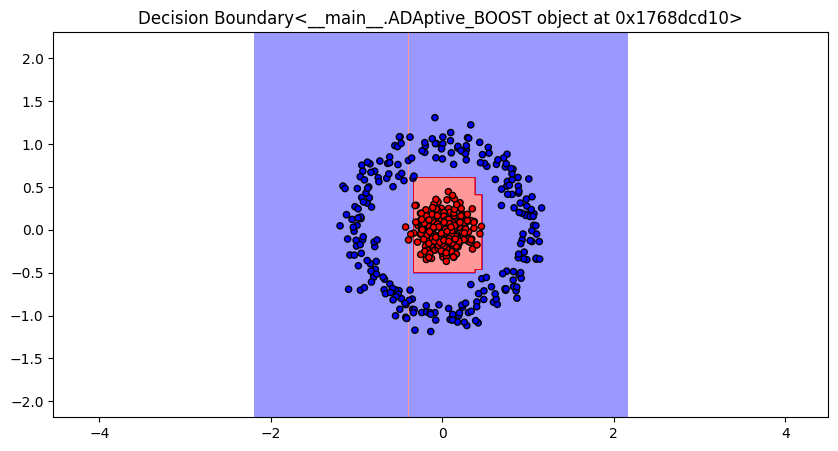

In [11]:
weak_classifiers = { 
	'Logistic Regression' : lambda: LogisticRegression(max_iter = 10_000),
    'Decisiton Tree (Stump)': lambda: DecisionTreeClassifier(max_depth = 1),
	'Linear SVM': lambda: SVC(kernel = 'linear', probability = True),
    'Decisiton Tree': lambda: DecisionTreeClassifier(max_depth = 5) 
}

for clf_name, clf in weak_classifiers.items():     
    adaboost = ADAptive_BOOST(weak_clf=clf, learning_rate=best_eta_) 
    adaboost.fit(X_train, y_train)
    prediction = adaboost.predict(X_test)
    accuracy = np.mean(prediction == y_test)
    print(clf_name, accuracy)
    
# Plot the final decision boundary
fig, ax = plt.subplots(figsize=(10, 5))
plot_decision_boundary(adaboost, X, y, ax)
plt.show()